In [1]:
import pandas as pd
from ptgnn.dataset.utils_chienn import get_chiro_data_from_mol
from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol

In [2]:
df = pd.read_pickle("src/rs/raw/train.pickle")
display(df)

,ID,SMILES_nostereo,rdkit_mol_cistrans_stereo,RS_label,RS_label_binary
0,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x00000219CD4...,S,1
1,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x00000219CD4...,S,1
2,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x00000219CD4...,S,1
3,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x00000219CD4...,S,1
4,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x00000219CD4...,S,1
...,...,...,...,...,...
326860,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000021A98B...,R,0
326861,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000021A98B...,R,0
326862,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000021A98B...,R,0
326863,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000021A98B...,R,0


In [3]:
df.ID.iloc[80]

'BrC/C=C/[C@@H](Br)CCBr'

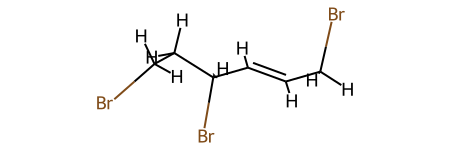

In [4]:
# mol_example = df.rdkit_mol_cistrans_stereo.iloc[6]# 0
mol_example = smiles_to_3d_mol(
    df.ID.iloc[80],
    max_number_of_attempts=100,
    max_number_of_atoms=100
)
display(mol_example)

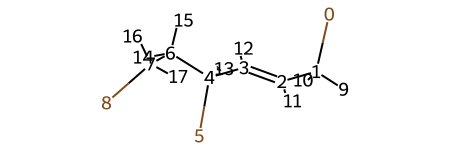

In [5]:
def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()))
    return mol
show_atom_number(mol_example, "atomLabel")

In [6]:
data = get_chiro_data_from_mol(mol_example)
display(data)

Data(x=[18, 52], edge_index=[2, 34], edge_attr=[34, 14], pos=[18, 3], bond_distances=[17], bond_distance_index=[2, 17], bond_angles=[30], bond_angle_index=[3, 30], dihedral_angles=[34], dihedral_angle_index=[4, 34])

In [9]:
from ptgnn.transform.vertex_graph.permutation_tree_selective import permutation_tree_vertex_transformation

transformed_data = permutation_tree_vertex_transformation(
    data,
    mol_example,
    3,
    tetrahedral_chiral=True,
    chiral_center_selective=True,
    chiral_center_select_potential=True,
    cis_trans_edges=True,
    cis_trans_edges_select_potential=True,
    create_order_matrix=True
)
display(transformed_data, transformed_data.ptree)

Data(x=[18, 52], edge_index=[2, 34], edge_attr=[34, 14], pos=[18, 3], bond_distances=[17], bond_distance_index=[2, 17], bond_angles=[30], bond_angle_index=[3, 30], dihedral_angles=[34], dihedral_angle_index=[4, 34], ptree=[18], initial_map=[70], layer0_order_matrix=[1], layer0_type_mask=[1], layer0_pooling=[1], num_layer=3, layer1_order_matrix=[1], layer1_type_mask=[1], layer1_pooling=[1], layer2_order_matrix=[1], layer2_type_mask=[1], layer2_pooling=[1])

['{"S": [0, {"P": [1]}]}',
 '{"S": [1, {"P": [0, 2, 9, 10]}]}',
 '{"S": [2, {"C": [1, 11, 4, 12]}]}',
 '{"S": [3, {"C": [4, 12, 1, 11]}]}',
 '{"S": [4, {"P": [{"Z": [17, 19, 21]}, {"Z": [12, 21, 19]}, {"Z": [12, 17, 21]}, {"Z": [12, 19, 17]}]}]}',
 '{"S": [5, {"P": [4]}]}',
 '{"S": [6, {"P": [4, 7, 14, 15]}]}',
 '{"S": [7, {"P": [6, 8, 16, 17]}]}',
 '{"S": [8, {"P": [7]}]}',
 '{"S": [9, {"P": [1]}]}',
 '{"S": [10, {"P": [1]}]}',
 '{"S": [11, {"P": [2]}]}',
 '{"S": [12, {"P": [3]}]}',
 '{"S": [13, {"P": [4]}]}',
 '{"S": [14, {"P": [6]}]}',
 '{"S": [15, {"P": [6]}]}',
 '{"S": [16, {"P": [7]}]}',
 '{"S": [17, {"P": [7]}]}']

## Manual construction

In [7]:
from ptgnn.transform.edge_graph.permutation_tree_selective import custom_to_edge_graph

edge_graph, node_mapping = custom_to_edge_graph(
    data=data,
)

In [28]:
from rdkit.Chem import AllChem
chiral_center_selective = True
chiral_center_select_potential = True
only_out = True

chiral_center_list = AllChem.FindMolChiralCenters(mol_example, includeUnassigned=chiral_center_select_potential)
chiral_center_list = [c[0] for c in chiral_center_list]
display(chiral_center_list)

[4]

In [29]:
import json
ptrees = []

# iterate over nodes
for idx in range(data.x.shape[0]):

    # todo: add chiral center filter - else P over all

    # get outgoing nodes (has tree of this nodes neighbors
    out_edges = data.edge_index[:, data.edge_index[0] == idx]

    if out_edges.shape[1] < 4 or (not idx in chiral_center_list):
        ptrees.append(json.dumps({
            "S": [
                int(idx),
                {"P": out_edges[1].tolist()}
            ]
        }))
        continue

    # iterate over edges, get circle index and create permutation tree
    circle_indices = [
        edge_graph.circle_index[node_mapping[(x, y)]]
        for x, y in out_edges.T.tolist()
    ]

    # merge tree and add to list
    ptrees.append(json.dumps({
        "S": [
            int(idx),
            {
                "P": [
                    {
                        "Z": circle_index
                    }
                    for circle_index in circle_indices
                ]
            }
        ]
    }))

In [30]:
ptrees

['{"S": [0, {"P": [1]}]}',
 '{"S": [1, {"P": [0, 2, 9, 10]}]}',
 '{"S": [2, {"P": [1, 3, 11]}]}',
 '{"S": [3, {"P": [2, 4, 12]}]}',
 '{"S": [4, {"P": [{"Z": [17, 19, 21]}, {"Z": [12, 21, 19]}, {"Z": [12, 17, 21]}, {"Z": [12, 19, 17]}]}]}',
 '{"S": [5, {"P": [4]}]}',
 '{"S": [6, {"P": [4, 7, 14, 15]}]}',
 '{"S": [7, {"P": [6, 8, 16, 17]}]}',
 '{"S": [8, {"P": [7]}]}',
 '{"S": [9, {"P": [1]}]}',
 '{"S": [10, {"P": [1]}]}',
 '{"S": [11, {"P": [2]}]}',
 '{"S": [12, {"P": [3]}]}',
 '{"S": [13, {"P": [4]}]}',
 '{"S": [14, {"P": [6]}]}',
 '{"S": [15, {"P": [6]}]}',
 '{"S": [16, {"P": [7]}]}',
 '{"S": [17, {"P": [7]}]}']

In [13]:
data.edge_index[:, data.edge_index[0] == 6]

tensor([[ 6,  6,  6,  6],
        [ 4,  7, 14, 15]])

In [33]:
from ptgnn.transform.edge_graph.permutation_tree_special import fetch_cis_trans_edges

cis_trans_edges_select_potential = False
cis_trans_nodes_list = fetch_cis_trans_edges(
    node_mapping,
    mol_example,
    cis_trans_edges_select_potential
)
display(cis_trans_nodes_list)

[(2, 3), (3, 2)]

[(2, 3), (3, 2)]